# Gráficos en Python 2
## Gráficos de Dispersión, Burbujas y Flujos


## A. Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [1]:
# Importar el módulo pyplot de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt

# Importar la librería pandas y abreviarlo a pd
import pandas as pd

import seaborn as sns
import numpy as np


## B. Cargar dataset

El dataset que cargaremos consiste propinas dadas en un restaurant

In [2]:
tips = sns.load_dataset("tips")

In [3]:
# Cuantas observaciones hay en el dataset ?
len(tips)

244

In [4]:
# Revisemos las 5 primeras filas
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##  C. Gráfico de Dispersión

### C.1 Usando matplotlib

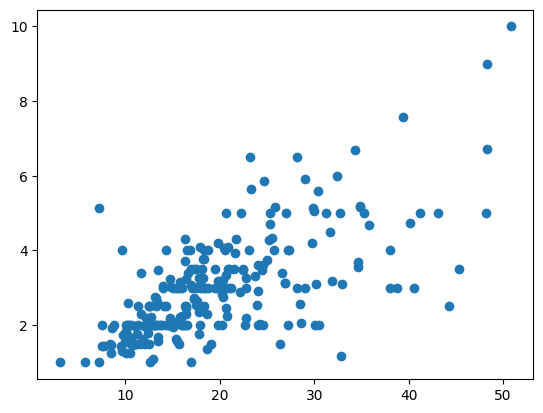

In [5]:
# Haremos un gráfico de dispersión donde el eje X muestra el monto total de la cuenta en el restaurante
# y el eje Y muesta la propina que se dio al mesero(a)

plt.scatter(tips.total_bill, tips.tip)


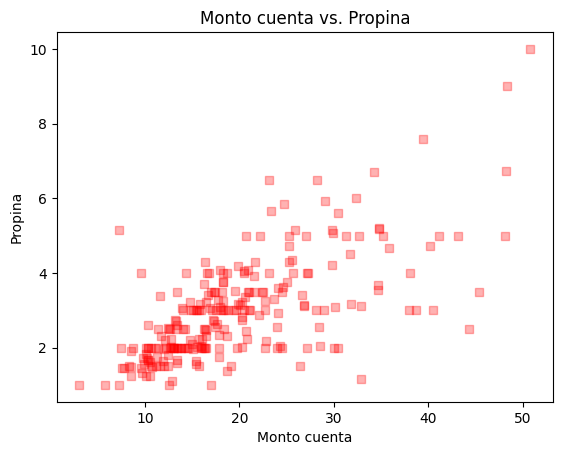

In [6]:
# Puede cambiar el estilo del punto (marker)
# marker [ '*' | '+' | ',' | '.' | '1' | '2' | '3' | '4' | 's' | 'o' ] 
# alpha controla transparencia

plt.scatter(tips.total_bill, tips.tip
            , color='red', marker = 's', alpha = 0.3)
plt.title("Monto cuenta vs. Propina")
plt.xlabel("Monto cuenta")
plt.ylabel("Propina")
plt.show()


### C.2 Gráfico de puntos con seaborn

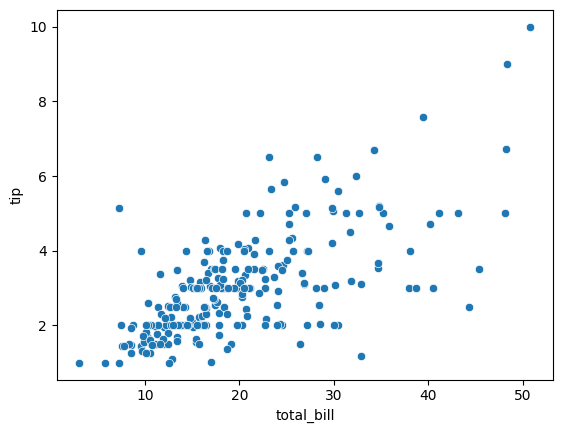

In [7]:
# Hagamos el gráfico inicial con seaborn
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

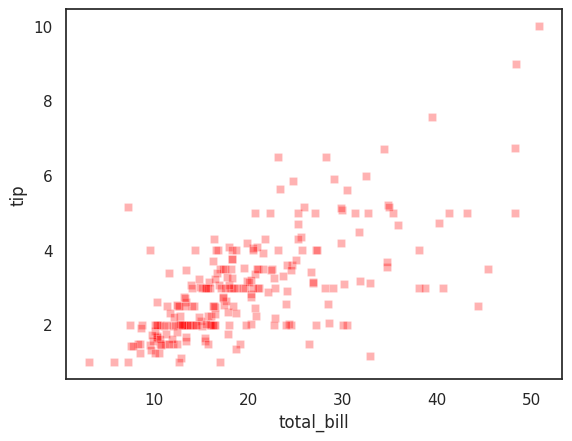

In [8]:
# Hagamos el gráfico con searborn cambiando algunos atributos
sns.set()
sns.set_style("white")

ax = sns.scatterplot(x="total_bill", y="tip", data=tips, color='red', marker = 's', alpha = 0.3)

##  D. Gráfico de Burbujas

Recordemos que el gráfico de burbujas es un caso especial del gráfico de dispersión donde
además utilizamos los canales de tamaño y color de los puntos presentados.

###  D.1 Gráfico de burbujas usando seaborn

In [9]:
# transformamos algunas columnas de valores categóricas en numéricas
smoker_num = tips.smoker.astype("category").cat.codes
time_num = tips.time.astype("category").cat.codes

Text(0, 0.5, 'Propina')

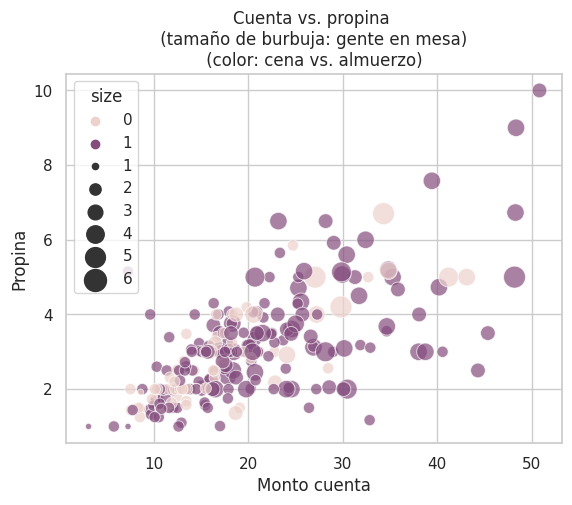

In [14]:
# podemos modificar varias atributos para hacer un bubbleplot en seaborn

# tamaño de los puntos con **size**
# color de los puntos on **hue**


sns.set_style("whitegrid")

ax = sns.scatterplot(x="total_bill", y="tip",
                     hue=time_num, size="size",
                     sizes=(20, 250), hue_norm=(0, 1.5), alpha=0.7,
                     legend="full", data=tips)

ax.set_title('Cuenta vs. propina \n (tamaño de burbuja: gente en mesa) \n (color: cena vs. almuerzo) ')
ax.set_xlabel("Monto cuenta")
ax.set_ylabel("Propina")

## Gráficos de Flujo

## Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones. Para esta clase `matplotlib` no es capaz de generar los gráficos de flujo y por ello recurriremos a la librería [`altair`](https://altair-viz.github.io/), la cual se escapa de las librerías obligatorias del curso y por lo mismo su instalación es obligatoria. Dado lo anterior, dentro de las evaluaciones no se solicitará crear este tipo de evaluaciones para no obligar su instalación. 


Si desea instalar la librería, los pasos son iguales a como se instaló `pandas` o `matplotlib`, es decir, escribir en la consola

**`pip3 install altair vega_datasets`**.

In [11]:
# Importar la librería altair y abreviarlo a alt
import altair as alt

In [12]:
alt.renderers.enable('default')
# Si el grafico al final de este tutorial no funciona
# probar con esta linea
# alt.renderers.enable('notebook')

RendererRegistry.enable('default')

## Cargar dataset

En esta ocasión, el _dataset_ corresponde a la cantidad de libros leido por una persona de diversos géneros entre el 2011 y 2019. Cada fila corresponde a la cantidad de libros de un género específico leido en un año en particular.

In [16]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("books.csv")

len(df)

90

In [17]:
# Ver las primeras 5 líneas del archivo
df.head(5)

,genre,year,count
0,acción,2010,17
1,acción,2011,19
2,acción,2012,12
3,acción,2013,9
4,acción,2014,11


## Generar visualización

Con altair definimos un gráfico cuyos datos será el dataframe (`df`) e indicamos que la marca a utilizar será el area.

In [18]:
plot = alt.Chart(df).mark_area()

Luego indicamos como se va a codificar este gráfico
* Primero indicamos con `alt.X(...)` cual será el **eje X**. En este caso es la columna "year" y ponemos un ":O" para indicar que es un dato ordinal.
* Segundo indicamos con `alt.Y(...)` cual será el **eje Y**. En este caso es la columna "count" y ponemos un ":Q" para indicar que es un dato cuantitativo. Además, le indicamos que todas estas áreas del gráfico de flujo estén alineadas en el centro y que no se muestre los números en el eje Y. si no se ponen ambos argumentos (`stack` y `axis`), estarímos frente a un gráfico de área aplidado.
* Tercero indicamos con `alt.Color(...)` cual columna utilizar para definir **el color**. En este caso es la columna "genre" y ponmoe un ":N" para indicar que es un dato nominal.

Finalmente, luego de definir toda la coficiación, hacemos `.properties(width=600)` para indicar cuantos pixeles utilizar de ancho.

In [20]:
plot.encode(
    alt.X('year:O'),
    alt.Y('count:Q'),
    alt.Color('genre:N')
).properties(width=600)

alt.Chart(...)